In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

tips = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/visualization/tips.csv')
tips

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


from matplotlib import pyplot as plt
tips['total_bill'].plot(kind='hist', bins=20, title='total_bill')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tips['tip'].plot(kind='hist', bins=20, title='tip')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tips['size'].plot(kind='hist', bins=20, title='size')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
tips.groupby('smoker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
tips.groupby('day').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
tips.groupby('time').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tips.plot(kind='scatter', x='total_bill', y='tip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
tips.plot(kind='scatter', x='tip', y='size', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['total_bill']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tips.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('smoker')):
  _plot_series(series, series_name, i)
  fig.legend(title='smoker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('total_bill')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['total_bill']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tips.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('day')):
  _plot_series(series, series_name, i)
  fig.legend(title='day', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('total_bill')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['total_bill']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tips.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('time')):
  _plot_series(series, series_name, i)
  fig.legend(title='time', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('total_bill')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time']
  ys = series['tip']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = tips.sort_values('time', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('smoker')):
  _plot_series(series, series_name, i)
  fig.legend(title='smoker', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time')
_ = plt.ylabel('tip')

from matplotlib import pyplot as plt
tips['total_bill'].plot(kind='line', figsize=(8, 4), title='total_bill')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tips['tip'].plot(kind='line', figsize=(8, 4), title='tip')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
tips['size'].plot(kind='line', figsize=(8, 4), title='size')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['day'].value_counts()
    for x_label, grp in tips.groupby('smoker')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('smoker')
_ = plt.ylabel('day')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['time'].value_counts()
    for x_label, grp in tips.groupby('day')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('day')
_ = plt.ylabel('time')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(tips['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tips, x='total_bill', y='smoker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(tips['day'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tips, x='total_bill', y='day', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(tips['time'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tips, x='total_bill', y='time', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(tips['smoker'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tips, x='tip', y='smoker', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

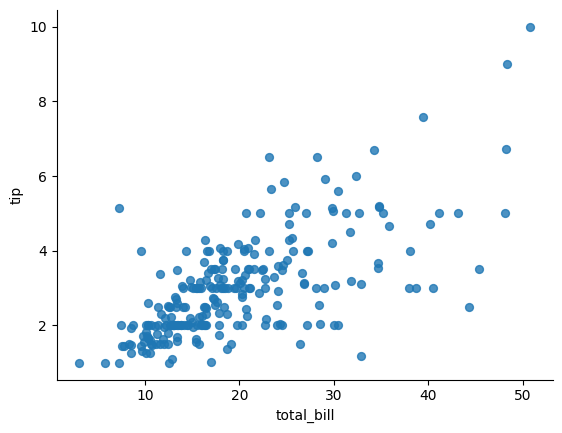

In [6]:
from matplotlib import pyplot as plt
tips.plot(kind='scatter', x='total_bill', y='tip', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   smoker      244 non-null    object 
 3   day         244 non-null    object 
 4   time        244 non-null    object 
 5   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 11.6+ KB


In [8]:
tips.total_bill.describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [9]:
tips.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

In [11]:
# 빈도표
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [12]:
pd.pivot_table(tips, index='day',
               columns='size',
               values='total_bill',
               aggfunc='count', fill_value=0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [13]:
pc_25 = party_counts.loc[:,2:5] # loc 는 인덱스가 아닌 정수! 즉 2부터5임
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [14]:
pc_25.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [15]:
# pc_25 각 열방향 합계 1로 정규화
pc_25.apply(lambda x : x/pc_25.sum(1))

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


In [16]:
pc_25.div(pc_25.sum(1), axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


팁이 10이고 총 청구 금액이 100인 경우, 팁의 퍼센트를 마크업과 마진으로 계산한 결과는 다음과 같습니다:

마크업 (Markup): 약 11.11%
- 마크업은 기본 비용에 대한 추가 비용(여기서는 팁)의 비율
- Tip / (Total Bill - Tip) x 100

마진 (Margin): 10%
- 마진은 전체 판매 가격(여기서는 총 청구 금액)에 대한 추가 비용(팁)의 비율
- Tip / Total Bill x 100

마크업은 순수한 비용(총 금액에서 팁을 제외한 금액)에 대한 추가 비용의 비율을, 마진은 전체 금액에 대한 추가 비용의 비율

   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

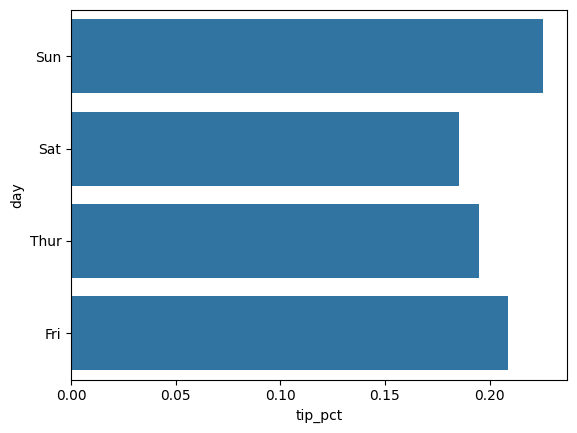

In [19]:
# 요일별 팁의 비중을 시각화(수평 막대그래프)
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip']) # tip 비중
print(tips.head())
sns.barplot(x='tip_pct', y='day', data=tips, orient='h', errorbar=None) # errorbar는 오차 막대를 제어

<Axes: xlabel='tip_pct', ylabel='day'>

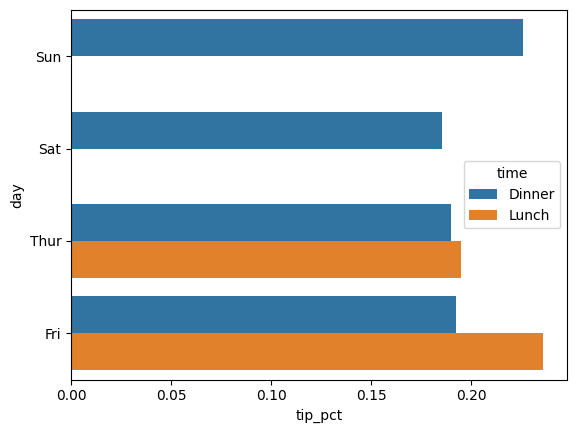

In [20]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h', errorbar=None)

In [21]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


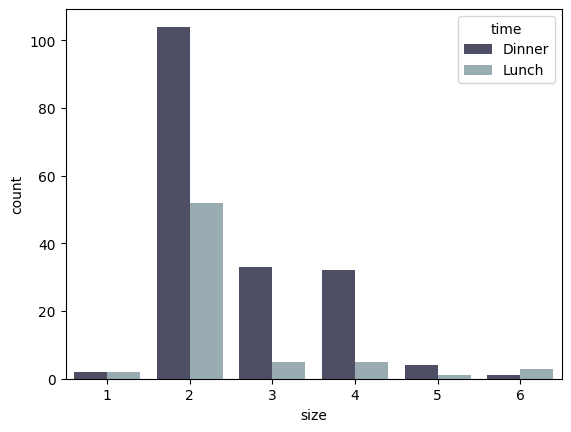

In [28]:
# countplot()
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.countplot(x='size', data=tips, hue='time', palette='bone')
plt.show() # colab 이나 주피터노트북은 없어도됨

In [33]:
# np.random.normal(loc, scale, size) : 정규분포 난수 샘플
comp1 = np.random.normal(0, 1, size=200) # 평균0, 표준편차1 -> 표준정규분포
# comp1 = np.random.normal(size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
values.describe()

count    400.000000
mean       4.961724
std        5.213118
min       -2.864367
25%       -0.053546
50%        4.033216
75%        9.991211
max       14.764371
dtype: float64

커널밀도추정(Kernel Density Estimation, KDE)
- kde=True는 seaborn의 histplot 함수에서 커널 밀도 측정(Kernel Density Estimation, KDE)을 활성화하는 옵션
- 히스토그램과 함께 데이터의 분포를 부드럽게 추정한 커널 밀도 그래프가 표시
- KDE 그래프는 데이터 포인트들이 어떻게 분포되어 있는지 시각적으로 보여주는 부드러운 곡선을 생성

<Axes: ylabel='Count'>

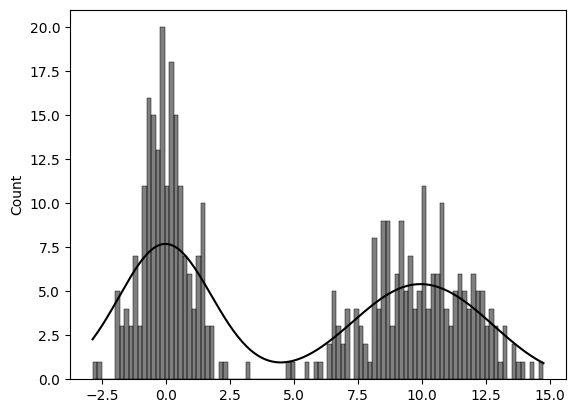

In [35]:
# kde - 커널 밀도 함수로 보기
sns.histplot(values, bins=100, color='k', kde=True) # kde 는 커널 밀도 분석. 부드럽게 보이게 해줌
# sns.displot(values, bins=100, color'k', kde=True)
# comp1 표준편차1, comp2 표준편차2

Q. 두개의 정규분포를 따르는 상이한 데이터 셋을 생성한 후 하나의 데이터 셋으로 병합한 후 시각화여 데이터의 분포를 확인하세요.

<Axes: ylabel='Count'>

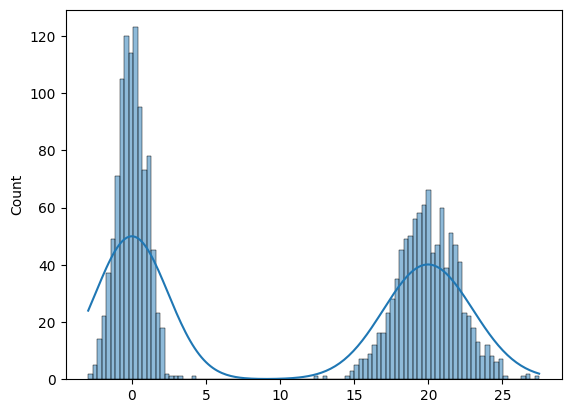

In [39]:
# A.
dataset1 = np.random.normal(size=1000)
dataset2 = np.random.normal(20, 2, size=1000)
values = pd.Series(np.concatenate([dataset1,dataset2]))
values.describe()
sns.histplot(values, bins=100, kde=True)

In [40]:
fish_multi = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/visualization/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


<Axes: xlabel='length', ylabel='Count'>

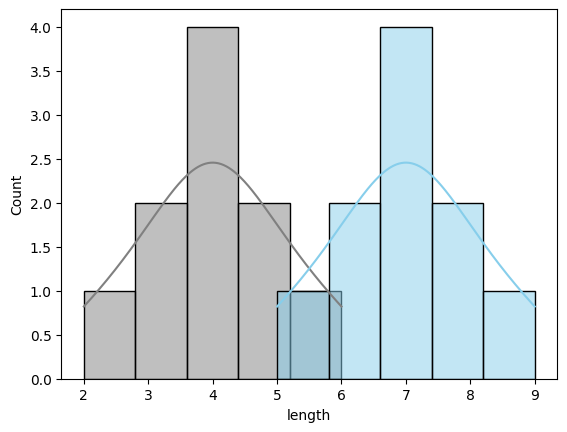

In [42]:
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.histplot(length_a, bins=5, color='gray', kde=True)
sns.histplot(length_b, bins=5, color='skyblue', kde=True)

Q. box plot 으로 A,B 비교

<Axes: xlabel='species', ylabel='length'>

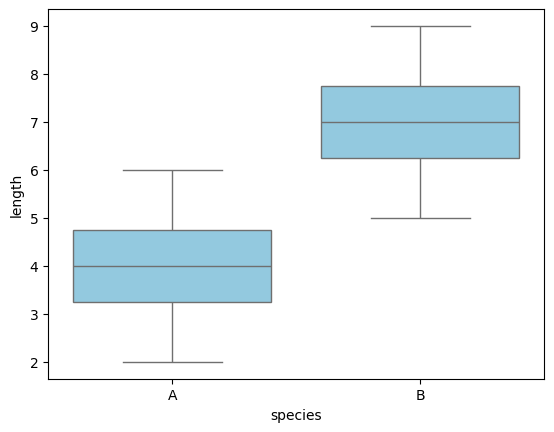

In [43]:
# A.
sns.boxplot(x='species', y='length', data=fish_multi, color='skyblue')

<Axes: xlabel='species', ylabel='length'>

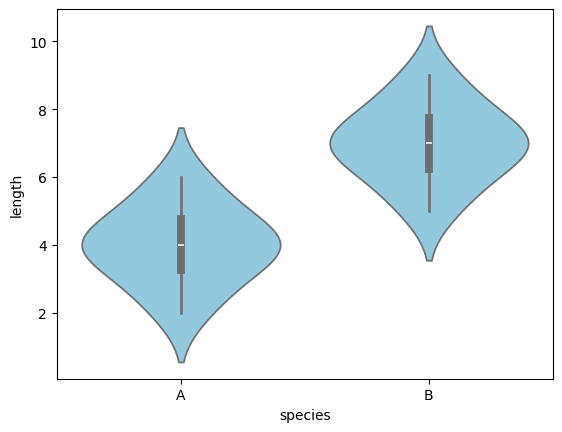

In [44]:
# 바이올린 플롯
# 커널 밀도추정의 결과를 y축 방향에 추가하여 데이터가 퍼져있는 분산의 정도 파악
sns.violinplot(x='species', y='length', data=fish_multi, color='skyblue')

In [45]:
cov_data = pd.read_csv('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/visualization/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


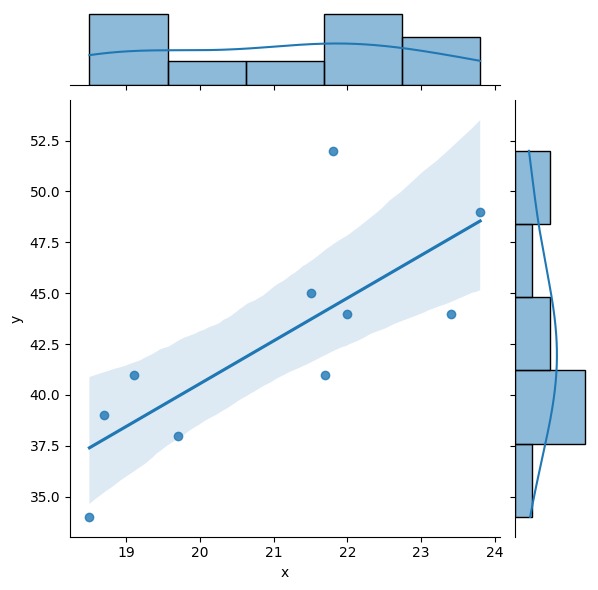

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'cov_data' is your DataFrame and it has columns 'x' and 'y'
sns.jointplot(x='x', y='y', data=cov_data, kind='reg')

plt.show()

sns.lmplot과 sns.regplot 차이점

기능적 차이:
- sns.lmplot: 이 함수는 FacetGrid를 사용하여 데이터를 다양한 카테고리별로 분할하여 여러 서브플롯을 만들 수 있다. 이는 데이터의 서브셋에 대한 회귀선을 별도로 그릴 수 있음을 의미.
sns.regplot: 이 함수는 단일 축 객체(ax)에 회귀선을 그리는 데 사용. 간단하고, 한 번에 하나의 관계만 표시.

입력 매개변수의 차이:
- sns.lmplot은 data 매개변수를 통해 DataFrame을 입력받으며, x와 y는 문자열로 열 이름을 지정.
- sns.regplot에서는 x와 y가 DataFrame의 열이거나 NumPy 배열일 수 있으며, data 매개변수는 선택사항.

사용상의 유연성:
- sns.lmplot은 regplot보다 더 많은 매개변수를 제공하여, 데이터를 세분화하고 다양한 방식으로 표시.
- sns.regplot은 더 단순하고 직관적인 옵션을 제공하여, 빠르고 간편하게 선형 회귀선을 그릴 수 있게 한다.

그래픽 표현의 차이:
- sns.lmplot은 내부적으로 FacetGrid를 사용하므로, 플롯의 구성과 스타일을 더 세밀하게 조정할 수 있다.
- sns.regplot은 주로 간단한 선형 관계를 표시하는데 적합하며, 복잡한 그래픽 설정은 제한적.

In [49]:
# 'x'와 'y' 열을 데이터 포인트로 사용하고, 'category' 열에 따라 서로 다른 색상의 선형 회귀선을 그렸습니다.
# 각 카테고리('A'와 'B')에 대한 회귀선이 서로 다른 색상으로 표시
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 임의의 데이터 생성
np.random.seed(10)
data = pd.DataFrame({
    'x': np.random.rand(50),
    'y': np.random.rand(50),
    'category': np.random.choice(['A','B'], 50)
})

In [54]:
data.head()

,x,y,category
0,0.771321,0.392529,A
1,0.020752,0.093460,A
2,0.633648,0.821106,B
3,0.748804,0.151152,B
4,0.498507,0.384114,A


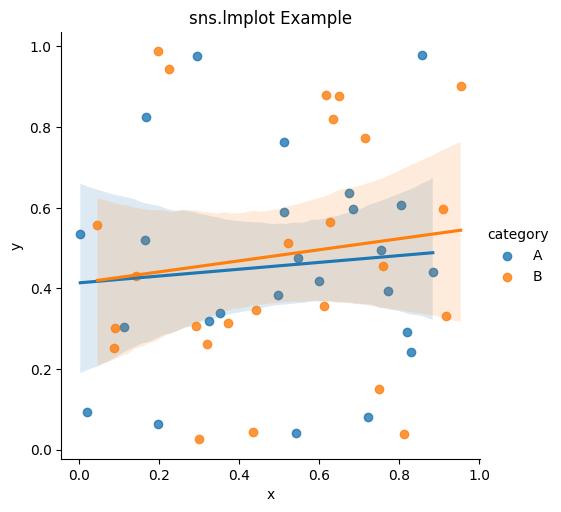

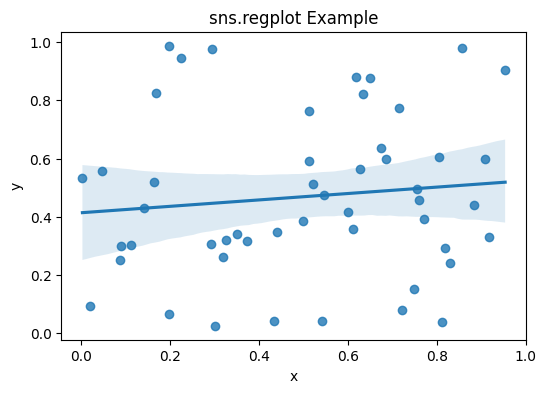

In [52]:
# sns.lmplot 사용 예시
sns.lmplot(x='x', y='y', data=data, hue='category')
plt.title('sns.lmplot Example')
plt.show()

# sns.regplot 사용 예시
plt.figure(figsize=(6,4))
sns.regplot(x='x', y='y', data=data)
plt.title('sns.regplot Example')
plt.show()

In [110]:
import pandas as pd
df_auto = pd.read_excel('/content/drive/MyDrive/hjh_kita_directory/Github/kita_231026/m3_분석라이브러리/visualization/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


<Axes: ylabel='mpg'>

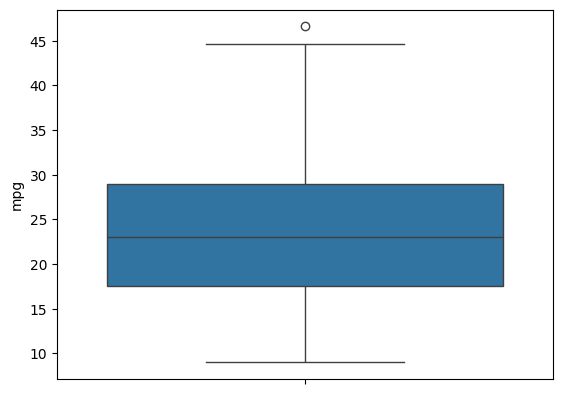

In [111]:
sns.boxplot(data=df_auto.mpg)

<Axes: xlabel='mpg'>

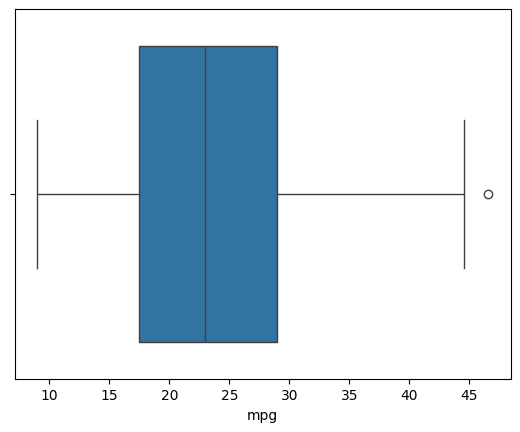

In [113]:
sns.boxplot(data=df_auto, x='mpg')

In [ ]:
sns.

Q. auto-mpg 데이터 셋에서 mpg와 weight의 선형 관계를 그래프로 작성하세요.(전체, origin에 따른 관계 2개 작성)

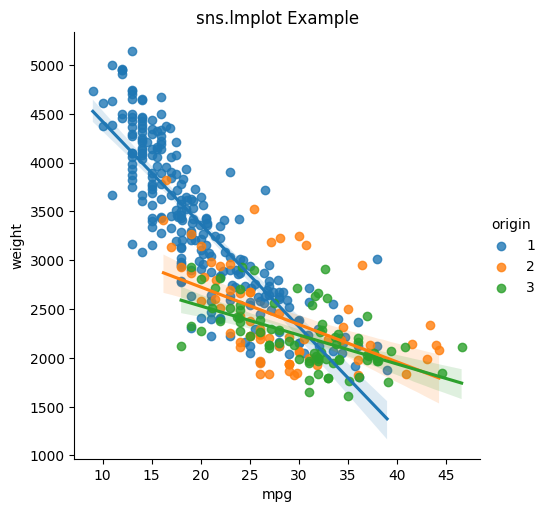

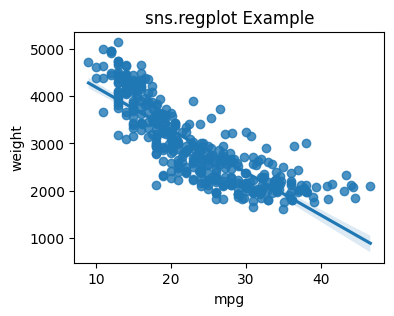

In [57]:
# A. 영우님 솔루션
sns.lmplot(x='mpg',y='weight',data=df_auto, hue='origin')
plt.title('sns.lmplot Example')
plt.show()

plt.figure(figsize=(4,3))
sns.regplot(x='mpg',y='weight',data=df_auto)
plt.title('sns.regplot Example')
plt.show()

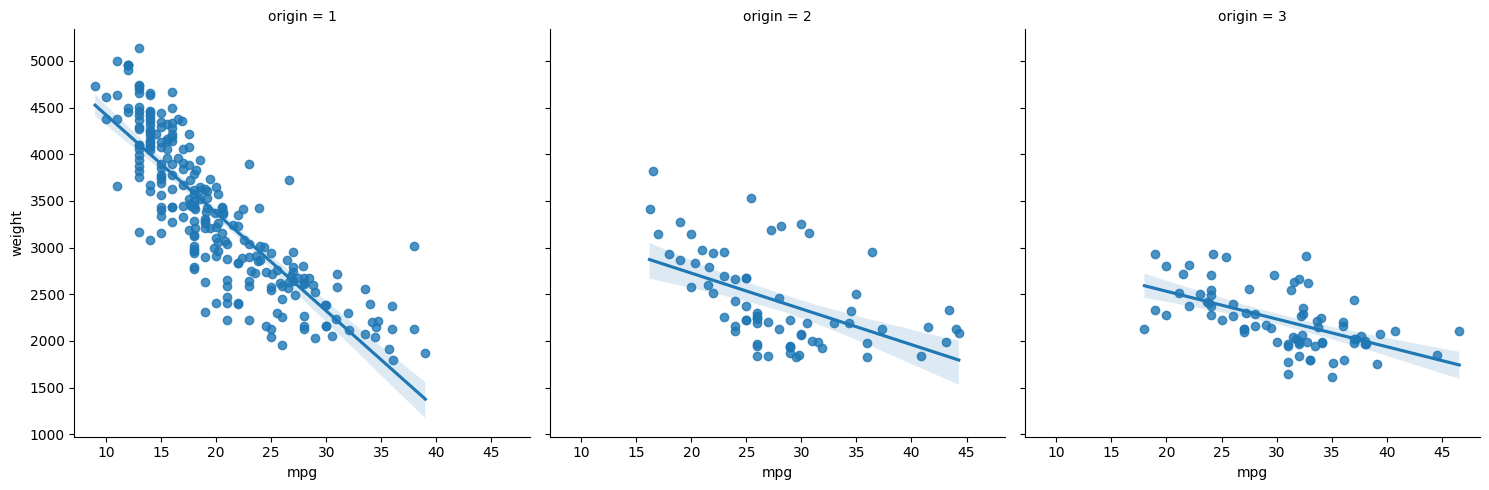

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
# 데이터프레임 df_auto 정의 필요 (예: sns.load_dataset('mpg') 사용 가능)

# mpg 와 weight의 관계, 1행 2열로 표시
# 첫 번째 열: 전체 데이터에 대한 그래프
sns.lmplot(x='mpg', y='weight', data=df_auto, col='origin', col_wrap=3) # col_wrap=3는 한 행에 최대 3개의 그래프를 표시하도록 설정

plt.show()

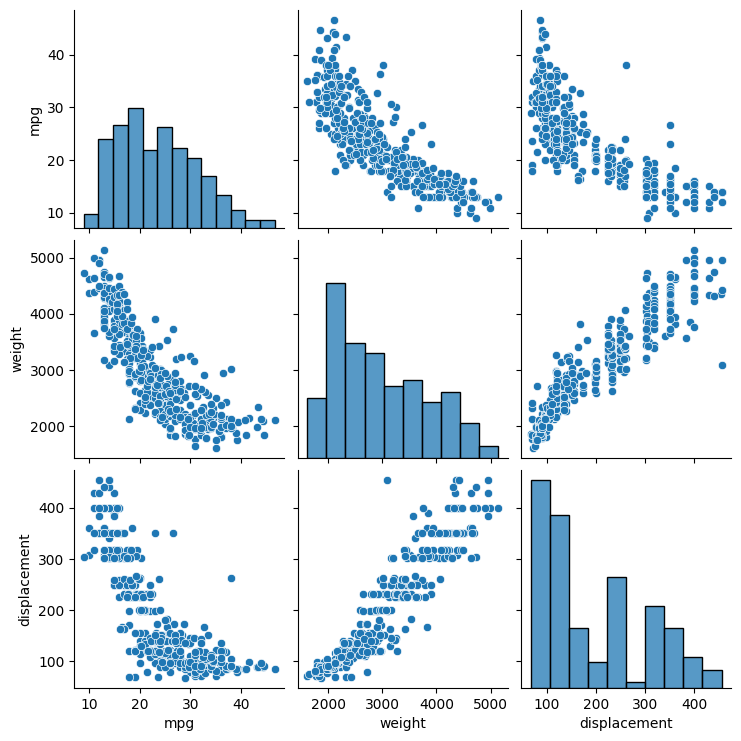

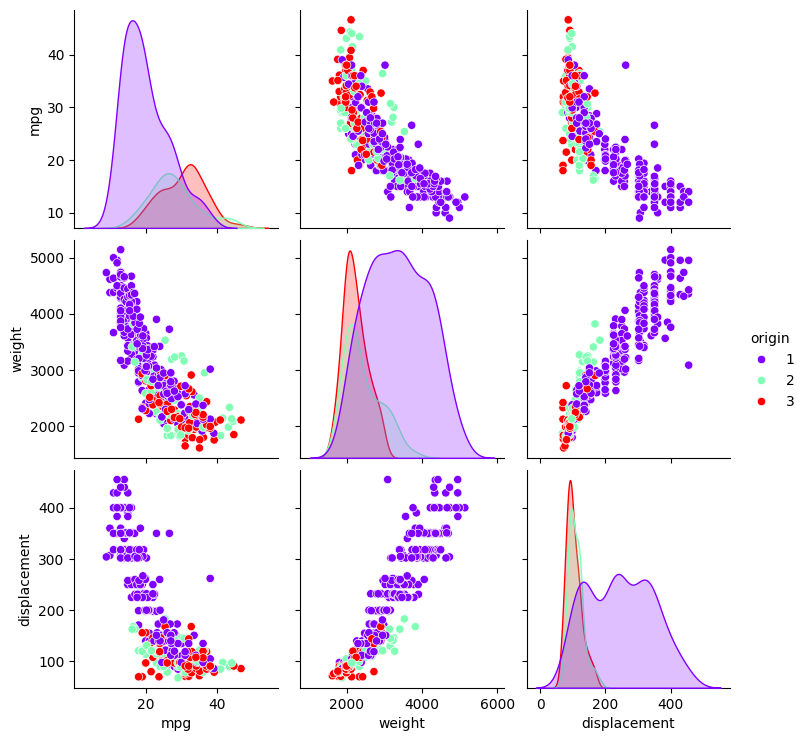

In [65]:
import seaborn as sns
sns.pairplot(df_auto[['mpg','weight','displacement']], palette='rainbow')
sns.pairplot(df_auto[['mpg','weight','displacement', 'origin']], hue='origin', palette='rainbow')

In [73]:
t_df = sns.load_dataset('titanic')
print(t_df)
t_df[['pclass','age','fare','survived']].corr()

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

,pclass,age,fare,survived
pclass,1.000000,-0.369226,-0.549500,-0.338481
age,-0.369226,1.000000,0.096067,-0.077221
fare,-0.549500,0.096067,1.000000,0.257307
survived,-0.338481,-0.077221,0.257307,1.000000


- sns.lineplot() 함수에서는 err_style 매개변수를 이용해 밴드의 스타일을 조정할 수 있습니다.
- 예를 들어, err_style='band'로 설정하면, 투명한 밴드가 그려지고, err_style='bars'로 설정하면, 오차 막대(error bar)가 그려집니다.

<Axes: xlabel='model year', ylabel='mpg'>

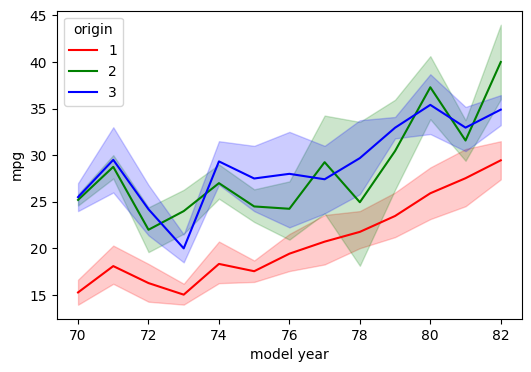

In [103]:
plt.figure(figsize=(6,4))
sns.lineplot(data = df_auto, x="model year", y="mpg", hue = "origin",\
             err_style='band', palette=['red','green','blue'])
# err_style='band' 혹은 bars 할 수 있음

Text(0.5, 1.0, 'Heatmap of the Dataset')

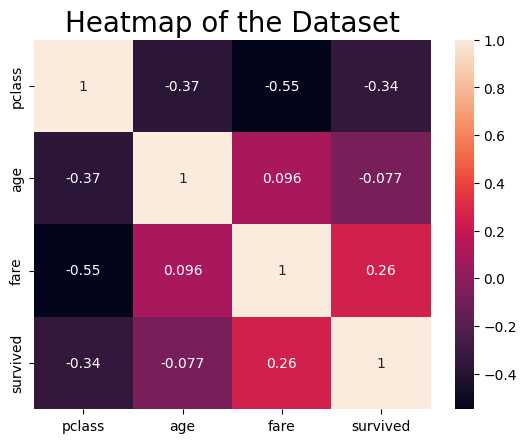

In [71]:
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(), annot=True) # annot 은 annotation 주석. 네모안에 주석.
plt.title('Heatmap of the Dataset', fontsize=20)

Q. sex와 class간의 생존율을 보여주는 히트맵을 작성하세요

In [104]:
t_df2['sex'] = t_df2['sex'].replace({'male': 0, 'female': 1})
t_df2['class'] = t_df2['class'].replace({'First': 0, 'Second':1, 'Third':2})

In [92]:
t_df2 = sns.load_dataset('titanic')
t_df2[['class','sex','survived']].corr()

,survived
survived,1.0


Text(0.5, 1.0, 'Heatmap of the Dataset')

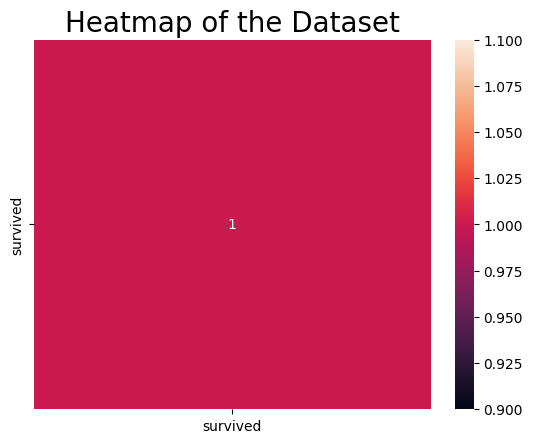

In [93]:
sns.heatmap(t_df2[['class','sex','survived']].corr(), annot=True)
plt.title('Heatmap of the Dataset', fontsize=20)

<Axes: xlabel='sex', ylabel='class'>

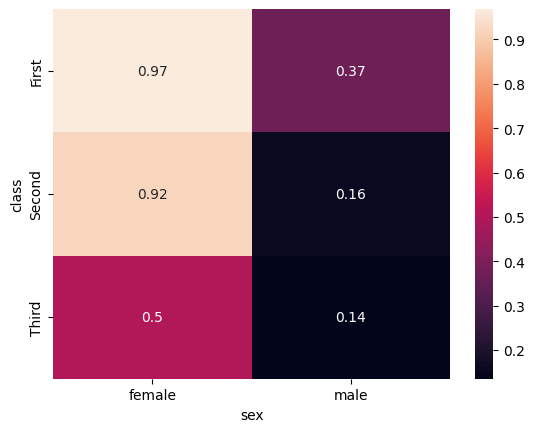

In [94]:
# A. 유빈님 솔루션
pivot = pd.pivot_table(t_df,index='class',
               columns='sex',
               values='survived',
               aggfunc=(lambda x:x.sum()/x.count()),fill_value=0)
sns.heatmap(pivot,annot=True)

In [99]:
table = t_df.pivot_table(index=['sex'], columns=['class'], values=['survived'],
                         aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

<Axes: xlabel='None-class', ylabel='sex'>

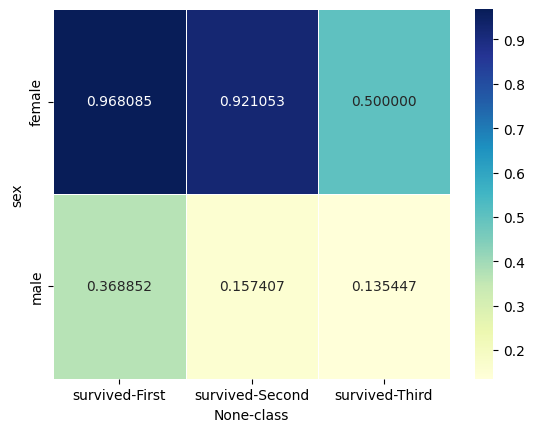

In [100]:
sns.heatmap(table,
            annot=True, fmt='f',
            cmap='YlGnBu',
            linewidth= .5,
            cbar=True)

In [ ]:
sns.heatmap(table,
            annot=True, fmt='f',
            cmap='YlGnBu',
            linewidth= .5,
            cbar=True)

In [105]:
import numpy as np
fish_data = np.array([5, 7, 9, 1, 5, 6, 6, 2, 4, 4, 5, 6, 7, 3, 8, 10])

<Axes: ylabel='Count'>

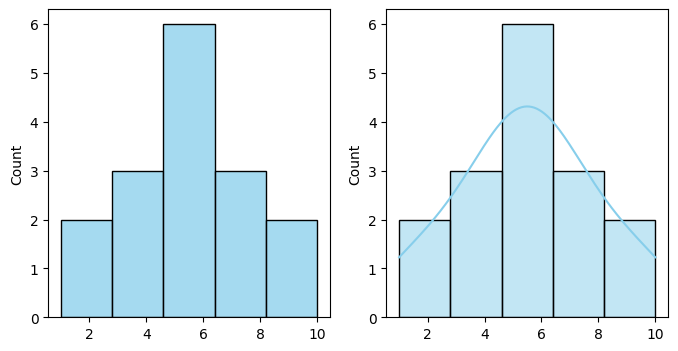

In [107]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.histplot(fish_data, color='skyblue', kde=False, ax=ax1)
sns.histplot(fish_data, color='skyblue', kde=True, ax=ax2)

Q1_0117. 타이타닉 데이터셋(sns.load_dataset('titanic'))을 사용하여, 클래스(class)별 승객 수를 나타내는 막대 그래프를 생성하세요.
- 각 막대 위에 승객 수 표시

In [114]:
# Q1_0117 솔루션

Q2_0117. sns.load_dataset('flights')을 로드하고, 이를 피벗 테이블로 변환하여 연도별 월간 승객 수를 나타내세요. 이 데이터를 사용하여 히트맵을 생성하세요. 색상 맵은 자요롭게 선택하세요.

Q3_0117. sns.load_dataset('penguins')을 사용하여 페어플롯(pariplot)을 생성하세요. 종(species)에 따라 다른 색상을 사용하세요. (hint: hue 사용)

Q4_0117. 타이타닉 데이터셋을 사용하여, 객실 등급(class)에 따른 탑승객의 나이를 나타내는 박스 플롯과 바이올린 플롯을 같은 그래프 내에서 나란히 생성하세요. 이를 통해 각 클래스별 나이 분포의 차이를 비교하세요.

Q5_0117. 펭귄 데이터셋을 사용하여, 각 종별로 섬(island)별 개체 수를 나타내는 카운트 플롯을 생성하세요. x축은 'island', hue는 'species'로 설정하세요.